<a href="https://colab.research.google.com/github/StetskoSergey/algotrade/blob/main/Get_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/StreamAlpha/tvdatafeed.git
!pip install git+https://github.com/bukosabino/ta.git

In [6]:
from tvDatafeed import TvDatafeed, Interval

username = 'svsfinpro'
password = 'My001svs314@'

tv = TvDatafeed(username, password)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from ta import add_all_ta_features
from ta.utils import dropna
from ta.volatility import BollingerBands

# Argument
(symbol: str, exchange: str = 'NSE', interval: Interval = Interval.in_daily, n_bars: int = 10, fut_contract: int | None = None, extended_session: bool = False) -> DataFrame)

# index
nifty_index_data = tv.get_hist(symbol='NIFTY',exchange='NSE',interval=Interval.in_1_hour,n_bars=1000)

# futures continuous contract
nifty_futures_data = tv.get_hist(symbol='NIFTY',exchange='NSE',interval=Interval.in_1_hour,n_bars=1000,fut_contract=1)

# crudeoil
crudeoil_data = tv.get_hist(symbol='CRUDEOIL',exchange='MCX',interval=Interval.in_1_hour,n_bars=5000,fut_contract=1)

# downloading data for extended market hours
extended_price_data = tv.get_hist(symbol="EICHERMOT",exchange="NSE",interval=Interval.in_1_hour,n_bars=500, extended_session=False)

In [17]:
data = tv.get_hist(symbol='CNYUSD',exchange='FX_IDC',interval=Interval.in_1_hour,n_bars=5000)

In [16]:
def add_BollingerBands(df, window=20, window_dev=2):

  indicator_bb = BollingerBands(close=df["close"], window=window, window_dev=window_dev)
  
  # Add Bollinger Bands features
  df['bb_bbm'] = indicator_bb.bollinger_mavg()
  df['bb_bbh'] = indicator_bb.bollinger_hband()
  df['bb_bbl'] = indicator_bb.bollinger_lband()

  # Add Bollinger Band high indicator
  df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

  # Add Bollinger Band low indicator
  df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

  # Add Width Size Bollinger Bands
  df['bb_bbw'] = indicator_bb.bollinger_wband()

  # Add Percentage Bollinger Bands
  df['bb_bbp'] = indicator_bb.bollinger_pband()

  df = dropna(df)


In [18]:
add_BollingerBands(data)

In [19]:
data

,symbol,open,high,low,close,volume,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,bb_bbw,bb_bbp
datetime,,,,,,,,,,,,,
2022-03-09 04:00:00,FX_IDC:CNYUSD,0.15826,0.15834,0.15824,0.15824,12.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2022-03-09 05:00:00,FX_IDC:CNYUSD,0.15825,0.15832,0.15804,0.15805,12.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2022-03-09 06:00:00,FX_IDC:CNYUSD,0.15810,0.15822,0.15810,0.15822,12.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2022-03-09 07:00:00,FX_IDC:CNYUSD,0.15817,0.15829,0.15817,0.15825,12.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2022-03-09 08:00:00,FX_IDC:CNYUSD,0.15825,0.15830,0.15825,0.15828,12.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-03 15:00:00,FX_IDC:CNYUSD,0.14767,0.14767,0.14745,0.14760,12.0,0.148262,0.148792,0.147733,0.0,1.0,0.714203,-0.125652
2023-02-03 16:00:00,FX_IDC:CNYUSD,0.14760,0.14760,0.14760,0.14760,1.0,0.148214,0.148797,0.147631,0.0,1.0,0.786570,-0.026674
2023-02-03 17:00:00,FX_IDC:CNYUSD,0.14760,0.14760,0.14760,0.14760,12.0,0.148166,0.148782,0.147549,0.0,0.0,0.832557,0.041572


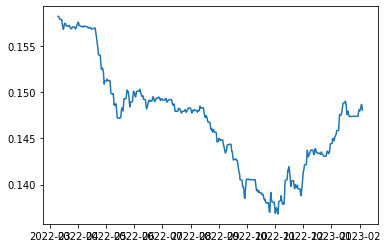

In [27]:
plt.plot(data['bb_bbm'])